# SENse Lab UCB
## Data Augmentation Notebook for DeepEthogram Mouse Behavior Video Processing
Anisha Iyer

This notebook is meant to provide a framework to preprocess lab data taken as mouse behavior videos from the lab camera into the format required for DeepEthogram, an automatic behavior scoring software. DeepEthogram is trained on infrared data, so this Notebook will aim to augment mouse videos to look like they have been taken with an infrared camera.

In [9]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab
import imageio
from IPython.display import Video

Regardless of how many times you run this cell, you will only get 3 additional pictures (plus the original one you loaded) because the filenames overwrite themselves.

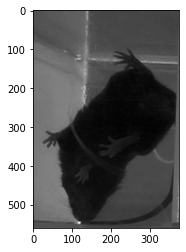

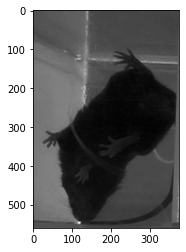

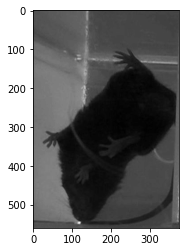

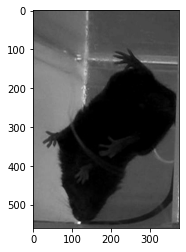

In [4]:
def gray(filename):
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
gray('mouse1.png')
gray('original-image.png')
gray('less-contrast-image.png')
gray('more-contrast-image.png')

## Loading in Data to Process

In [5]:
vid_capture = cv2.VideoCapture('pos_hist.mp4')
if (vid_capture.isOpened() == False):
    print("Error opening the video file")
else:
    # Get frame rate information
    fps = int(vid_capture.get(5))
    print("Frame Rate : ",fps,"frames per second") 
    # Get frame count
    frame_count = vid_capture.get(7)
    print("Frame count : ", frame_count)

Frame Rate :  1 frames per second
Frame count :  20.0


In [6]:
success,image = vid_capture.read()
count = 0
while success:
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
    cv2.imwrite("frame%d.png" % count, gray)     # save frame as png file      
    success,image = vid_capture.read()
    print('Read a new frame: ', success)
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  False


In [8]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
out = cv2.VideoWriter('video.mp4', fourcc, 1, (20, 20))

for j in range(count):
    img = cv2.imread("frame%d.png" % + j)
    out.write(img)

cv2.destroyAllWindows()
out.release()

In [11]:
Video("pos_hist.mp4")